# Percettrone

## Dataset

Generiamo un dataset giocattolo per sperimentare con un classificatore percettrone

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

dim = 3
threshold = 1
points = 10000

def generate_dataset(n):
  # Generate n points in dim-dimensional space
  points = np.random.rand(n, dim)

  # Create a DataFrame from the points
  df = pd.DataFrame(points)

  # Assign column names
  df.columns = [f"x{i}" for i in range(dim)]

  df["label"] = np.where(df.sum(axis=1) < threshold, -1, 1)

  return df

In [ ]:
df = generate_dataset(points)

In [ ]:
df.loc[[1]]

,x0,x1,x2,label
1,0.700529,0.379033,0.670184,1


## Dataset exploration

In [ ]:
df.head()

,x0,x1,x2,label
0,0.119733,0.150069,0.620038,-1
1,0.700529,0.379033,0.670184,1
2,0.743161,0.023432,0.032233,-1
3,0.005829,0.566998,0.779563,1
4,0.746498,0.047145,0.116464,-1


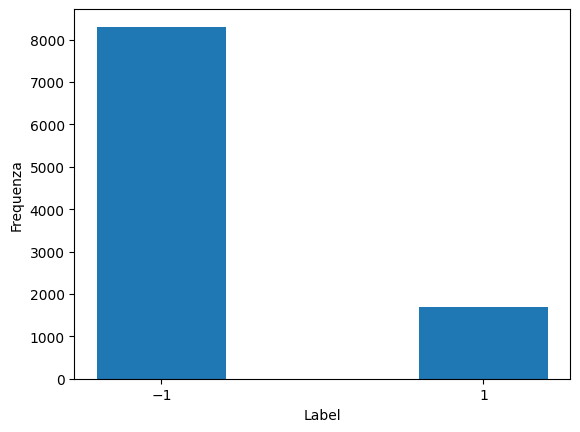

In [ ]:
import matplotlib.pyplot as plt

plt.bar(df["label"].unique(), df["label"].value_counts())
plt.ylabel("Frequenza")
plt.xlabel("Label")
plt.xticks([-1, 1])
plt.show()

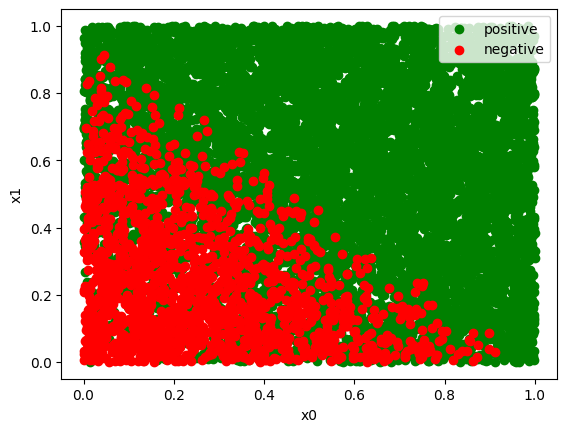

In [ ]:
# Dividiamo il DataFrame in due sotto-DataFrame in base alla label
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == -1]

# Plot degli scatter plot per i due sotto-DataFrame
fig, ax = plt.subplots()
ax.scatter(df_pos['x0'], df_pos['x1'], c='green', label='positive')
ax.scatter(df_neg['x0'], df_neg['x1'], c='red', label='negative')

ax.legend()
ax.set_xlabel('x0')
ax.set_ylabel('x1')

plt.show()

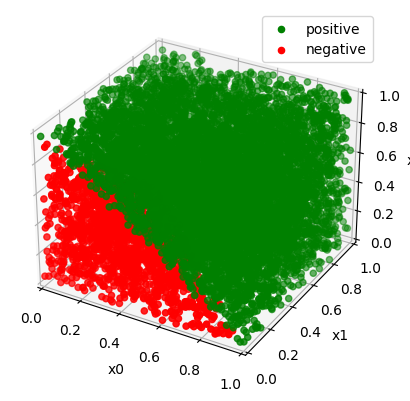

In [ ]:
# Filter positive and negative data
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == -1]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot positive and negative points in 3D
ax.scatter(df_pos['x0'], df_pos['x1'], df_pos['x2'], c='green', label='positive')
ax.scatter(df_neg['x0'], df_neg['x1'], df_neg['x2'], c='red', label='negative')

# Set axis limits between 0 and 1
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Add legend and axis labels
ax.legend()
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.show()

In questo laboratorio dovrai **implementare il percettrone (tradizionale)** e il **percettrone (delta rule)**, seguendo questo pseudocodice:
<br><br>

**def** funzione(data, threshold) {

1. Initialize the weights: w0=-threshold, w1,w2 random

2. Set a control variable for convergence

3. Check convergency: all instances shluld be correctly classified.

  3a. Adjust weights for misclassified instances

4. return weights

}

In [ ]:
initial_weights = np.random.rand(dim)
print("initial weights: ", initial_weights)

initial weights:  [0.70961924 0.02256822 0.82883021]


In [ ]:
def perceptron_old(data, bias):
  # Initialize weights
  weights = np.insert(initial_weights, 0, -bias)
  converged = False
  epoch = 0
  pbar = tqdm(total=epoch+1, unit="epoch", bar_format="Epoch #{n} [{elapsed}, {rate_fmt}]", position=0, leave=True)
  # Train
  while not converged:
    epoch += 1
    pbar.update(1)
    converged = True
    # Epoch
    for index, instance in data.iterrows():
      # Preprocess instance
      input = np.array([1] + [instance[f"x{i}"] for i in range(dim)])
      target = instance["label"]
      # Predict classification
      prediction = np.sign(np.sum(input * weights))
      # Compute error
      error = target - prediction
      # If prediction is off (error != 0), update weights
      if error:
        converged = False
        weights = np.add(weights, error * input)
  pbar.close()
  return weights

w = perceptron_old(df, threshold)
print(f"\nfinal weights: {w}")

Epoch #578 [06:48,  1.41epoch/s]


final weights: [-131.          131.07117444  130.77100605  130.97880606]


In [ ]:
def perceptron(data, bias):
  # Initialize weights
  weights = np.insert(initial_weights, 0, -bias)
  # Compute dataframe-wise input and target
  input = np.column_stack((np.ones(len(data)), *[data[f"x{i}"] for i in range(dim)]))
  target = np.array(data["label"])
  converged = False
  epoch = 0
  pbar = tqdm(total=epoch+1, unit="epoch", bar_format="Epoch #{n} [{elapsed}, {rate_fmt}]", position=0, leave=True)
  while not converged:
    epoch += 1
    pbar.update(1)
    prediction = np.sign(np.sum(input * weights, axis=1))
    error = target - prediction
    converged = np.all(error == 0)
    weights = np.add(weights, np.sum(error.reshape(error.size, 1) * input, axis=0))
  pbar.close()
  return weights

w = perceptron(df, threshold)
print(f"\nfinal weights: {w}")

Epoch #1277 [00:01, 1182.75epoch/s]


final weights: [-6829.          6836.18360384  6816.06689082  6825.70609591]


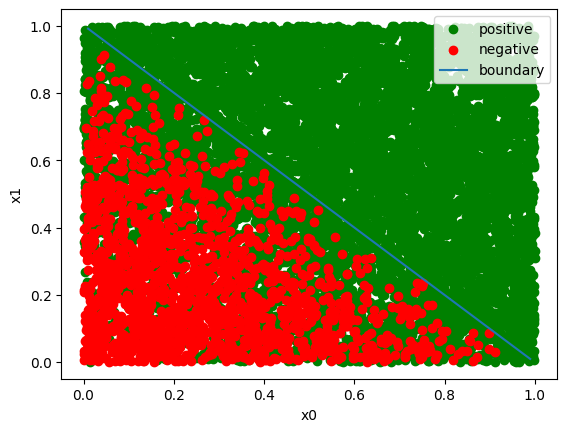

In [ ]:
# Dividiamo il DataFrame in due sotto-DataFrame in base alla label
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == -1]

# Plot degli scatter plot per i due sotto-DataFrame
fig, ax = plt.subplots()
ax.scatter(df_pos['x0'], df_pos['x1'], c='green', label='positive')
ax.scatter(df_neg['x0'], df_neg['x1'], c='red', label='negative')

# Plot the boundary line predicted by the perceptron
x = np.linspace(0, 1, 100)
y = -(w[1] * x + w[0]) / w[2]

# Clip values that would go out of bounds in the plot
x = x[y >= 0]
y = y[y >= 0]
x = x[y <= 1]
y = y[y <= 1]

plt.plot(x, y, label="boundary")

ax.legend()
ax.set_xlabel('x0')
ax.set_ylabel('x1')

plt.show()

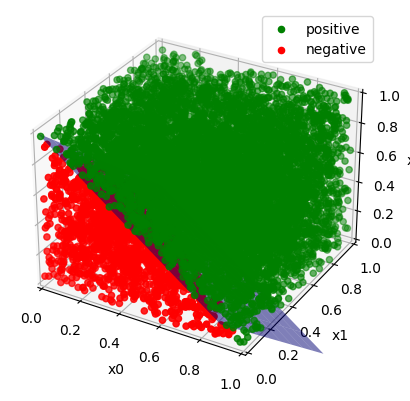

In [ ]:
# Filter positive and negative data
df_pos = df[df['label'] == 1]
df_neg = df[df['label'] == -1]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot positive and negative points in 3D
ax.scatter(df_pos['x0'], df_pos['x1'], df_pos['x2'], c='green', label='positive')
ax.scatter(df_neg['x0'], df_neg['x1'], df_neg['x2'], c='red', label='negative')

# Define a grid for x and y to calculate z for the boundary plane
x_range = np.linspace(0, 1, 10)
y_range = np.linspace(0, 1, 10)
x, y = np.meshgrid(x_range, y_range)

# Plot the boundary plane predicted by the perceptron)
z = -(w[1] * x + w[2] * y + w[0]) / w[3]

# Clip values that would go out of bounds in the plot
x = x[~np.all(z < 0, axis=1)][:, ~np.all(z < 0, axis = 0)]
y = y[~np.all(z < 0, axis=1)][:, ~np.all(z < 0, axis = 0)]
z = z[~np.all(z < 0, axis=1)][:, ~np.all(z < 0, axis = 0)]
x = x[~np.all(z > 1, axis=1)][:, ~np.all(z > 1, axis = 0)]
y = y[~np.all(z > 1, axis=1)][:, ~np.all(z > 1, axis = 0)]
z = z[~np.all(z > 1, axis=1)][:, ~np.all(z > 1, axis = 0)]

# Plot the plane
ax.plot_surface(x, y, z, color='blue', alpha=0.5)

# Set axis limits between 0 and 1
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)

# Add legend and axis labels
ax.legend()
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.show()